In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/opt/anaconda3/envs/python_course/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /Users/macbook/.cache/huggingface/datasets/lukebarousse___data_jobs/default/0.0.0/ed776e5a0a8c40ea9d5efbd800772ae52e140f3e (last modified on Fri Jun 13 16:31:13 2025).


In [2]:
df_DS = df[df['job_title_short'] == 'Data Scientist'].copy()

In [22]:
df_DS['job_posted_month_no'] = df_DS['job_posted_date'].dt.month

df_DS_explode = df_DS.explode('job_skills')

df_DS_pivot = df_DS_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DS_pivot.loc['Total'] = df_DS_pivot.sum()

df_DS_pivot = df_DS_pivot[df_DS_pivot.loc['Total'].sort_values(ascending=False).index]

df_DS_pivot = df_DS_pivot.drop('Total')

df_DS_pivot

job_skills,python,sql,r,sas,tableau,aws,spark,azure,tensorflow,excel,...,huggingface,fastify,esquisse,workfront,play framework,nuxt.js,mattermost,shogun,sqlserver,wimi
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,13998,9811,7566,3842,3446,3253,3222,2582,2316,2132,...,0,0,0,0,0,0,0,0,0,0
2,9551,6600,5064,2644,2566,2089,2085,1716,1525,1453,...,0,0,1,0,0,0,0,0,0,0
3,9210,6374,4971,2480,2456,2092,1992,1727,1405,1440,...,0,0,0,1,0,0,0,1,0,0
4,9135,6270,4873,2444,2447,2055,1905,1665,1546,1456,...,0,2,0,0,0,0,0,0,0,0
5,8029,5583,4228,2244,2271,1921,1716,1442,1271,1202,...,0,0,0,0,0,0,0,0,0,0
6,9338,6473,5019,2282,2432,2173,2072,1739,1580,1324,...,0,1,1,0,0,0,0,0,0,0
7,9400,6678,5029,2300,2547,2207,1972,1845,1535,1425,...,1,0,0,0,0,0,0,0,0,0
8,11193,8026,6089,3100,3013,2571,2466,2130,1972,1795,...,0,0,0,0,1,0,0,0,0,0
9,8393,5748,4153,2224,2062,1923,1820,1704,1462,1352,...,3,0,0,0,0,0,0,0,0,0


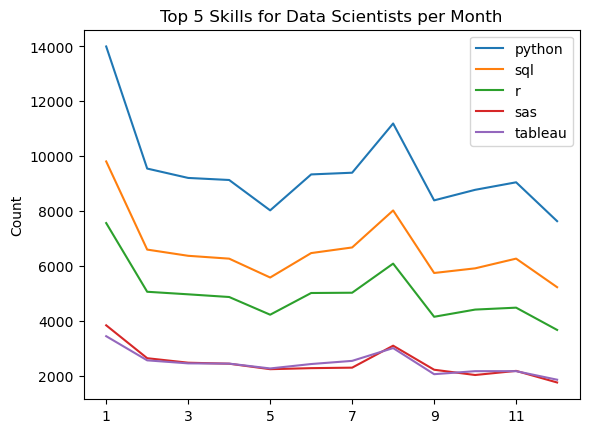

In [29]:
df_DS_pivot.iloc[:, :5].plot(kind='line')
plt.title('Top 5 Skills for Data Scientists per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.legend()
plt.show()

In [32]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

df_DA_explode = df_DA.explode('job_skills')

df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_pivot.loc['Total'] = df_DA_pivot.sum()

df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_pivot = df_DA_pivot.drop('Total')

df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,xamarin,mattermost,gtx,esquisse,chainer,capacitor,nuxt.js,msaccess,ovh,suse
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,0,0,0,0,0,1,1,0,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,1,0,0,0,0,0,0,0,0,1
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,0,0,0,0,1,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,1,0,0
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,1,0,0,0,0,0,0,0,0


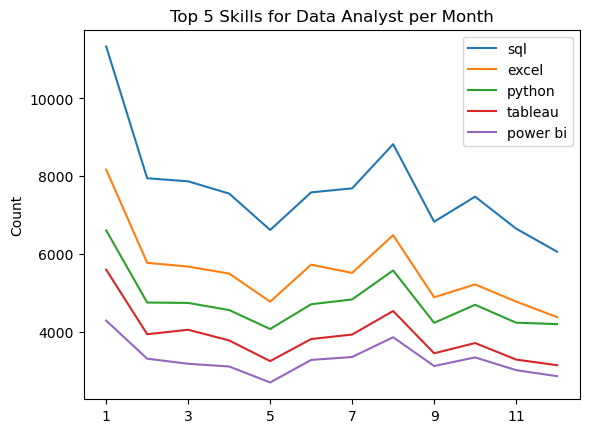

In [33]:
df_DA_pivot.iloc[:, :5].plot(kind='line')
plt.title('Top 5 Skills for Data Analyst per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.legend()
plt.show()

In [39]:
df_DE = df[df['job_title_short'] == 'Data Engineer'].copy()

df_DE['job_posted_month_no'] = df_DE['job_posted_date'].dt.month

df_DE_explode = df_DE.explode('job_skills')

df_DE_pivot = df_DE_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DE_pivot.loc['Total'] = df_DE_pivot.sum()

df_DE_pivot = df_DE_pivot[df_DE_pivot.loc['Total'].sort_values(ascending=False).index]

df_DE_pivot = df_DE_pivot.drop('Total')

df_DE_pivot

job_skills,sql,python,aws,azure,spark,java,kafka,hadoop,scala,databricks,...,shogun,fastify,workfront,dlib,ember.js,homebrew,asp.netcore,linode,chainer,dingtalk
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,12987,12426,6924,7138,6567,4246,3687,3533,3517,3002,...,2,0,0,0,0,0,0,0,0,0
2,9792,9378,5446,5278,4948,3300,2809,2774,2625,2272,...,1,0,0,0,0,0,0,0,0,0
3,9831,9410,5580,5283,4764,3223,2689,2592,2621,2378,...,0,0,0,0,0,0,0,0,0,0
4,8975,8670,5012,4901,4316,2931,2329,2340,2373,2170,...,0,0,0,0,0,3,0,0,1,0
5,8411,8169,4768,4466,3991,2725,2166,2195,2132,2034,...,0,0,0,0,0,0,1,0,0,0
6,9713,9216,5280,5091,4654,3092,2516,2468,2464,2317,...,0,0,1,0,0,0,0,0,0,0
7,9032,8493,5015,4857,4044,2757,2296,2235,2213,2161,...,0,0,2,2,0,0,0,0,0,0
8,9565,9016,5330,5070,4436,2961,2468,2421,2427,2310,...,0,0,1,0,0,0,1,0,0,0
9,8663,8213,4612,4646,3902,2584,2088,2024,2070,2198,...,1,0,0,0,0,0,0,1,0,0


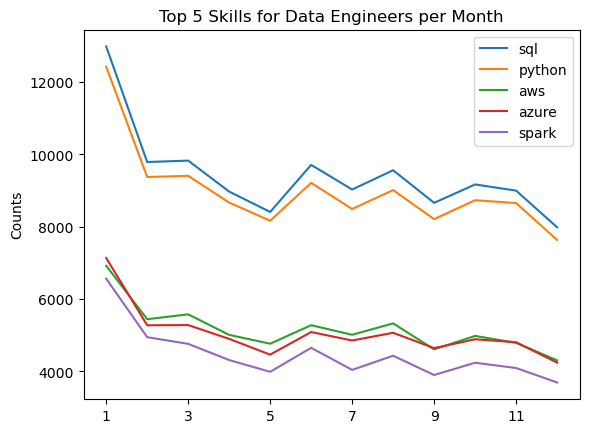

In [42]:
df_DE_pivot.iloc[:, :5].plot(kind='line')
plt.title('Top 5 Skills for Data Engineers per Month')
plt.ylabel('Counts')
plt.xlabel('')
plt.legend()
plt.show()